# **PROGRAMMING ASSIGNMENT 1**

## Q1. *Right Ascension and Declination*

RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h 59m 28.3566s , Dec +40° 44′ 02.096″)

In [23]:
#install necessary libraries
!pip install astropy matplotlib -q

In [24]:
#import libraries, set manual location (IIT KANPUR)
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, FK5
iitk_loc = EarthLocation(lat=26.5123*u.deg, lon=80.2329*u.deg, height=126*u.m)

In [25]:
#we have to first define the co-ordinates of Cygnus A in J2000 timesnap
cygnus_a_j2000 = SkyCoord(ra='19h59m28.3566s', dec='+40d44m02.096s', frame='icrs')
now = Time.now()
#we can now transform the co-oedinates we originally processed to modern day timestamp
cygnus_a_now = cygnus_a_j2000.transform_to(FK5(equinox=now))
print(f"Present Time: {now.iso}")
print("")
print(f"J2000 Coordinates:  \nRA: {cygnus_a_j2000.ra:.9f}, Dec: {cygnus_a_j2000.dec:.9f}")
print("")
print(f"Current Coordinates (Epoch {now.jyear_str}):\nRA: {cygnus_a_now.ra:.9f}, Dec: {cygnus_a_now.dec:.9f}")

Present Time: 2026-01-18 09:22:16.946

J2000 Coordinates:  
RA: 299.868152500 deg, Dec: 40.733915556 deg

Current Coordinates (Epoch J2026.048):
RA: 300.093594944 deg, Dec: 40.806383338 deg


In [26]:
#we can convert to sexagesimal format for convenience
print("J2000 Coordinates:")
print(f"RA:  {cygnus_a_j2000.ra.to_string(unit=u.hour, sep=':')} (h:m:s)")
print(f"Dec: {cygnus_a_j2000.dec.to_string(unit=u.deg, sep=':')} (d:m:s)")
print()
print(f"Current Coordinates (Epoch {now.jyear_str}):")
print(f"RA:  {cygnus_a_now.ra.to_string(unit=u.hour, sep=':')} (h:m:s)")
print(f"Dec: {cygnus_a_now.dec.to_string(unit=u.deg, sep=':')} (d:m:s)")

J2000 Coordinates:
RA:  19:59:28.3566 (h:m:s)
Dec: 40:44:02.096 (d:m:s)

Current Coordinates (Epoch J2026.048):
RA:  20:00:22.46278665 (h:m:s)
Dec: 40:48:22.98001686 (d:m:s)


Cygnus A is a radio source whose lcoation is determined from the Frame of Reference of Earth in the Jan-2000 Epoch. However the angles of Right Ascension and Declination are both estimated from the 'Vernal Equinox' (Sun corsses the Equator in March). The equatorial plane however is in constant precession motion, causing a slow drift over time. This results in a change in co-ordinates, albeit minor, owing to the **Precession of Earth's axis of rotation.**

The code aims at first determing Cygnus' original position, then utilizing the present date and time to make the tranfromation accordingly. The final (current) RA and Dec are provided, first in standard degree format, then transformed to the more well-known sexagesimal format.

Hence, to determine the final position of Cygnus A, we need to adjust to today's precession parameters and apply the respective changes to J2000 co-ordinates.

# *Q2. Azimuth and Elevation*

What will be this source’s azimuth and elevation when observing from IIT Kanpur?

In [27]:
#we need to define the Azimuthal frame for IIT Kanpur at the present time
altaz_frame = AltAz(obstime=now, location=iitk_loc)
#now we can Transform Cygnus A to altaz
cyg_altaz = cygnus_a_j2000.transform_to(altaz_frame)
print(f"Observer Location: IIT Kanpur")
print(f"Azimuth:   {cyg_altaz.az.to(u.deg):.4f}")
print(f"Elevation: {cyg_altaz.alt.to(u.deg):.4f}")

Observer Location: IIT Kanpur
Azimuth:   304.2012 deg
Elevation: 55.2500 deg


We need to determine the azimuthal angle and the elevation angle for the source. For this we need to first consider the frame of reference, i.e, IIT Kanpur from where the source is observed. Another scale to remember is the time-of-day. As both these parameters are time-sensitive.

The code aims to first transform the original position of Cygnus with the reference of present time and day. It then extracts the azimuth and elevation from its modern psoition today.

With each of these consideration, we finally arrive at a proper result for both the Azimuth measured from True North along the horizon, and the Elevation, measured from the horizon.

# *Q3. Polar Plot*

Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.

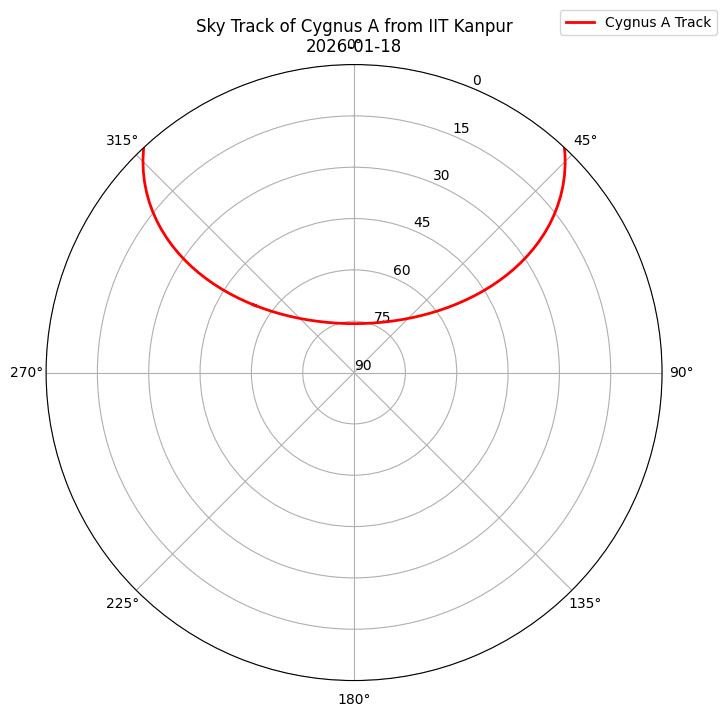

In [28]:
#we create a time array for the next 24 hours to serve as our input parameter
time_array = now + np.linspace(0, 24, 100) * u.hour
#now we can sufficiently transform Cygnus A's co-ordinates according to the time array created previously
cyg_track = cygnus_a_j2000.transform_to(AltAz(obstime=time_array, location=iitk_loc))

azimuths = cyg_track.az.rad
zenith_distances = 90 - cyg_track.alt.deg

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')


ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

#Plotting
ax.set_rlim(0, 90)
ax.set_yticks(np.arange(0, 91, 15))
ax.set_yticklabels(ax.get_yticks()[::-1])
ax.plot(azimuths, zenith_distances, label='Cygnus A Track', color='red', lw=2)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax.set_title(f"Sky Track of Cygnus A from IIT Kanpur\n{now.iso.split()[0]}", va='bottom')
plt.show()

**FIG 1. CYGNUS A ;** Trace as observed

In [29]:
import plotly.graph_objects as go
import numpy as np
# 1. We create a time array for the next 24 hours (more points = smoother curve)
time_array = now + np.linspace(0, 24, 400) * u.hour
# 2. Transform coordinates for the whole array
track = cygnus_a_j2000.transform_to(AltAz(obstime=time_array, location=iitk_loc))

# 3. Filter for "Visible" only (Elevation > 0) [removes any 'underground' view]
mask = track.alt.deg > 0
visible_az = track.az.deg[mask]
visible_alt = track.alt.deg[mask]

# 4. We make the Plot
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = 90 - visible_alt,   # r=0 is Zenith, r=90 is Horizon
    theta = visible_az,     # Azimuth angle
    mode = 'lines',
    name = 'Cygnus A',
    line_color = 'red',
    line_width = 3
))
# 5. We fix the layour of the plot
fig.update_layout(
    title=dict(
        text=f"Sky Track of Cygnus A from IIT Kanpur ({now.iso.split()[0]})",
        y=0.95
    ), width=800, height=800, polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 90],
            tickvals=[0, 30, 60, 90],
            ticktext=['90° (Zenith)', '60°', '30°', '0° (Horizon)'],
        ),
        angularaxis=dict(
            direction="clockwise",  # Azimuth increases clockwise
            rotation=90,            # 0 degrees (North) is at the top
            tickmode="array",
            tickvals=[0, 90, 180, 270],
            ticktext=["N", "E", "S", "W"]
        )
    )
)

fig.show()

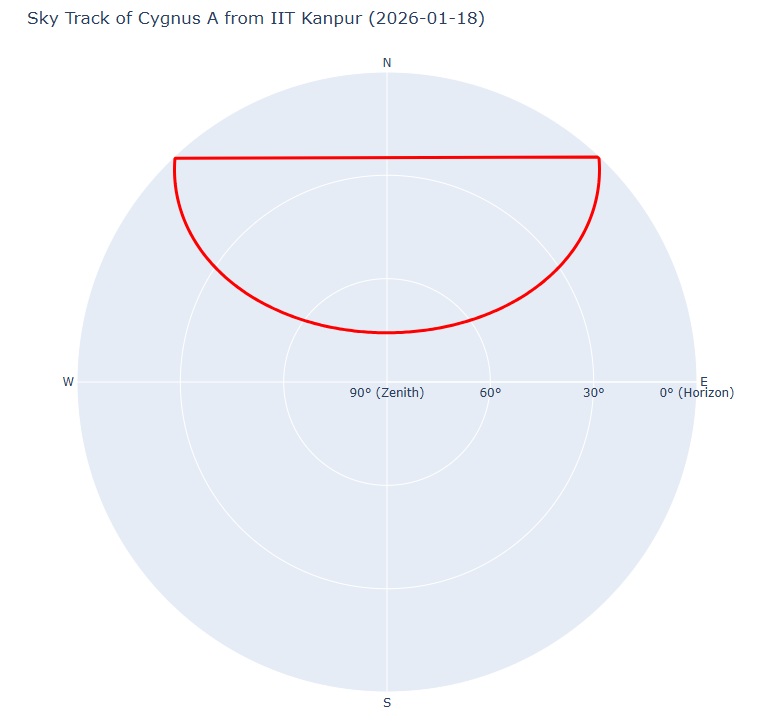

**FIG 2 : CYGNUS A;** TRACE INTERACTIVE

The objective is for us to plot the tranjectory (azimuth, elevation) of Cygnus A. To ensure this, we create both a static matplotlib diagram, and an interactive js figure. The hidden portion of the Cygnus Trajectory is ignored in both scenarios. The Azimuth completes its roation, while the zenith (r=90) is fixed for elevation.

The code initiates an array for the next 24 hour time period, taking a total of 400 snapshots unfiormly spread across to provide a smooth curve. Then the positions of Cygnus A is determined for each of these 'snapshots'. Fianlly, the combined info is plotted to achieve the graph relevant to Cygnus' positioning across the time period.

**LEGEND:**

r== *Distance from Zenith (90°-Elevation)*

θ== *Azimuth (calcualted from True North)*

# *Q4. SUN*

Plot how Sun’s RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?

In [30]:
from astropy.coordinates import get_sun
# 1. We create a 1-year time range (starting from now) with 365 steps
times_year = now + np.linspace(0, 365, 365) * u.day

# 2. We get Coordinates for the sun
sun_path = get_sun(times_year)
# Comapred to the sun, Cygnus A's position is almost relatively fixed.
cyg_path = cygnus_a_j2000.transform_to(FK5(equinox=times_year))


# 3. Plotting
fig = go.Figure()
# The Sun
fig.add_trace(go.Scatter(
    x = sun_path.ra.hour,
    y = sun_path.dec.deg,
    mode = 'markers',
    name = 'Sun',
    marker = dict(
        size=5,
        color=np.arange(365),
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Day of Year")
    )
))
# Cygnus A
fig.add_trace(go.Scatter(
    x = cyg_path.ra.hour,
    y = cyg_path.dec.deg,
    mode = 'lines+markers',
    name = 'Cygnus A',
    line = dict(color='red', width=4)
))
# Ensure proper layout for the plot
fig.update_layout(
    title="Annual Motion: Sun vs Cygnus A (RA/Dec)",
    xaxis_title="Right Ascension (hours)",
    yaxis_title="Declination (degrees)",
    xaxis = dict(range=[0, 24]),
    yaxis = dict(range=[-30, 90]),
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="right",
        x=1.02
    ),
    width=900,
    height=600
)
fig.show()

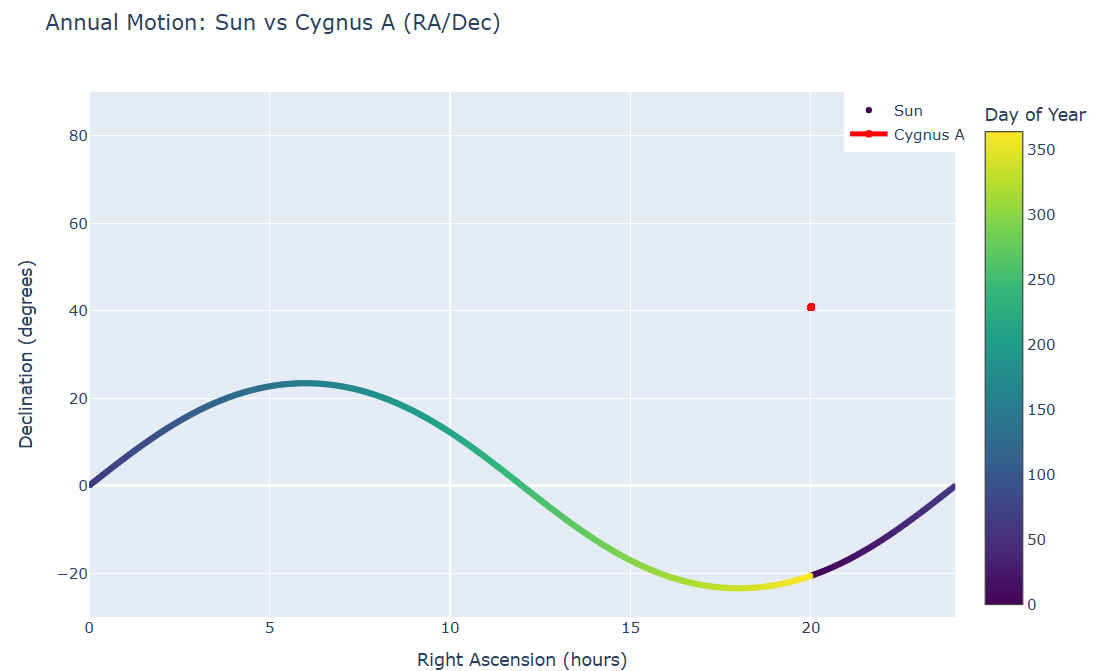

**Fig 3. SUN vs CYGNUS A** ; RA and DEC

We must first understsand the relative motion of both entities in question. The sun is seen to visibly move across the observation sphere owing to its proximity and the nature of earth's revolution around it. On the other hand, Cygnus A is a distant galaxy whose position remains largely fixed across the year. This means the Orbital Mechanics that contributes heavily to the movement of the Sun's position has negligible effect on the co-ordinates of Cygnus A.

The code considers a time frame of ~1 year, with multiple snapshots. It then records the position of the Sun and the radio source, Cygnus A across this time period. The final task is to then plot them beside one another to show the stark difference in variation of positions.

# **APPENDIX**

The assignment aims at studying the dynamics of a distant radio source, Cygnus A, to test the variation in its paths, trace its path as viewed from Earth and to finally compare it to the Sun's movements.

In order to bring this code to fruition the following aids were used:
1. **GEMINI AI** - Gemini was used for proof-reading code-blocks and improving layout of the plots forged. It was further used to introduce basic functions of the astropy module, that were used throughout the assignment.